**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**Load Dataset**

In [2]:
from sklearn.datasets import fetch_20newsgroups

# Load dataset
news = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Create DataFrame
df = pd.DataFrame({'text': news.data, 'category': news.target})
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (18846, 2)


,text,category
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4


**Text Preprocessing**

In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.25, random_state=42)

# Convert text into numerical vectors
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Training Data Shape:", X_train_tfidf.shape)


Training Data Shape: (14134, 5000)


**Train Naïve Bayes Classifier**

In [5]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb.predict(X_test_tfidf)


**Evaluate Model Performance**

In [6]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=news.target_names))


Accuracy: 0.849320882852292

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.85      0.86      0.86       198
           comp.graphics       0.68      0.80      0.73       245
 comp.os.ms-windows.misc       0.79      0.78      0.78       242
comp.sys.ibm.pc.hardware       0.67      0.76      0.71       238
   comp.sys.mac.hardware       0.86      0.82      0.84       250
          comp.windows.x       0.87      0.85      0.86       260
            misc.forsale       0.82      0.81      0.82       241
               rec.autos       0.87      0.89      0.88       244
         rec.motorcycles       0.88      0.92      0.90       219
      rec.sport.baseball       0.92      0.93      0.93       261
        rec.sport.hockey       0.90      0.96      0.93       245
               sci.crypt       0.96      0.94      0.95       251
         sci.electronics       0.86      0.76      0.81       249
                 sci.m

**Confusion Matrix Visualization**

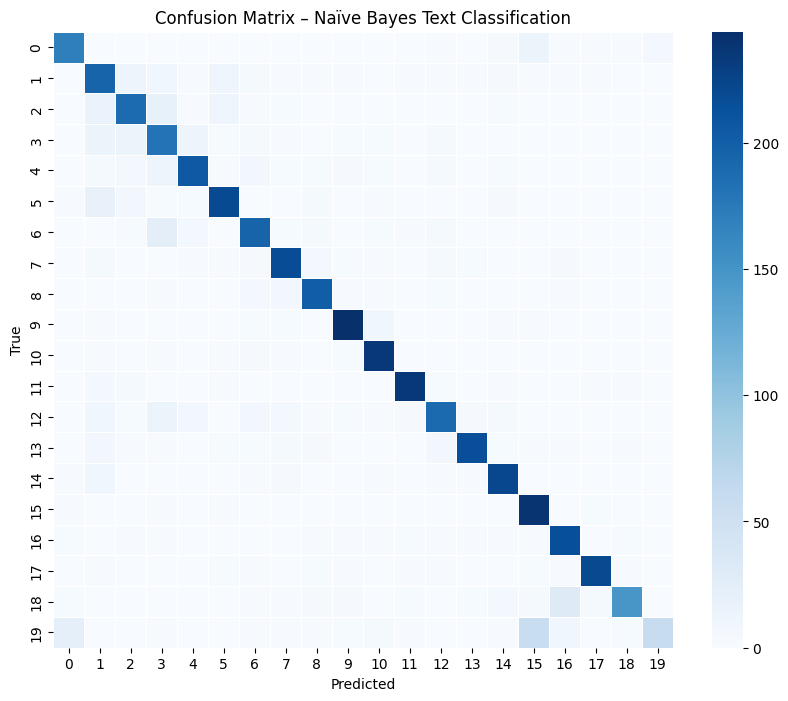

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix – Naïve Bayes Text Classification")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**Predict Custom Text Samples**

In [8]:
# Test on your own text samples
samples = [
    "I love watching football and cricket.",
    "NASA discovered a new exoplanet near the Milky Way.",
    "The new iPhone has amazing features and battery life."
]

sample_features = tfidf.transform(samples)
predicted_categories = nb.predict(sample_features)

for text, label in zip(samples, predicted_categories):
    print(f"\n📝 Text: {text}\n🔹 Predicted Category: {news.target_names[label]}")



📝 Text: I love watching football and cricket.
🔹 Predicted Category: rec.sport.baseball

📝 Text: NASA discovered a new exoplanet near the Milky Way.
🔹 Predicted Category: sci.space

📝 Text: The new iPhone has amazing features and battery life.
🔹 Predicted Category: misc.forsale
